In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
from src.functions import prepare_data_cols, covariance_analysis, portfolio_allocation

N_TRIALS = 5000

In [3]:
data = pd.read_excel('data_work.xlsx', sheet_name='data1', skiprows=3)

In [4]:
data, data_dict = prepare_data_cols(data)

In [5]:
data_return = data.pct_change().apply(lambda x: np.log(1+x)).iloc[1:,:]
data_volatility = np.sqrt(data_return.var() * 250)
sharp_ratio = data.resample('Y').last().pct_change().mean()/data_volatility

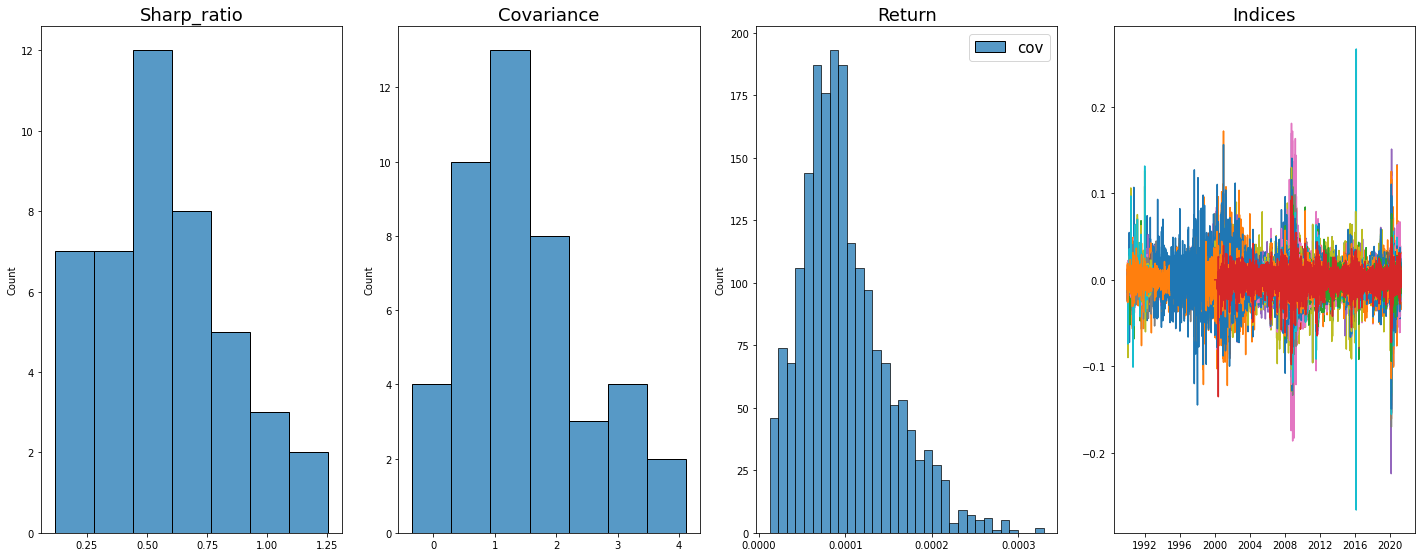

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,8))
plt.rc('font', size=15)

sns.histplot(sharp_ratio, ax=ax[0])
sns.histplot(data_return.sum(), ax=ax[1])
sns.histplot(covariance_analysis(data_return), ax=ax[2])
ax[3].plot(data_return)

ax[0].set_title('Sharp_ratio')
ax[1].set_title('Covariance')
ax[2].set_title('Return')
ax[3].set_title('Indices')

plt.tight_layout()

# Selection Method 3

In [7]:
#best 17
method_3 = list(sharp_ratio.nlargest(3).index)
method_3.extend(list(data.resample('Y').last().pct_change().mean().nlargest(3).index))
method_3.extend(list(data_return.cov().sum().nsmallest(4).index))

In [8]:
#best 20

method_3 = list(sharp_ratio.nlargest(4).index)
method_3.extend(list(data.resample('Y').last().pct_change().mean().nlargest(4).index))
method_3.extend(list(data_return.cov().sum().nsmallest(2).index))

In [9]:
# best 21
method_3 = list(sharp_ratio.nlargest(5).index)
method_3.extend(list(data.resample('Y').last().pct_change().mean().nlargest(3).index))
method_3.extend(list(data_return.cov().sum().nsmallest(2).index))

In [10]:
#best 23
method_3 = list(sharp_ratio.nlargest(6).index)
method_3.extend(list(data.resample('Y').last().pct_change().mean().nlargest(3).index))
method_3.extend(list(data_return.cov().sum().nsmallest(1).index))

In [194]:
method_3 = list(sharp_ratio.nlargest(6).index)
method_3.extend(list(data.resample('Y').last().pct_change().mean().nlargest(1).index))
method_3.extend(list(data_return.cov().sum().nsmallest(1).index))

In [195]:
method_3 = list(set(method_3))

In [196]:
method_3

['SHSZ300', 'NYGBIG', 'STXTDSV', 'IXAROBU', 'SOLBATT', 'CPQ', 'IXDIGITU']

In [197]:
method_3_add = ['MXWOSC', 'MXCN', 'SPLPEQTY']

In [198]:
sharp_ratio[method_3_add]

MXWOSC      0.585174
MXCN        0.224060
SPLPEQTY    0.350384
dtype: float64

In [199]:
method_3.extend(method_3_add)

In [200]:
len(set(method_3))

10

# Calc

In [205]:
portfolio_method3 = portfolio_allocation(data[method_3], 10000)

In [206]:
portfolio_method3.max()['Returns']

0.20817312307307995

In [207]:
portfolio_method3.max()['Sharp_ratio']

1.0560619916778646

Text(0.5, 1.0, 'Volatiltily Return Relationship')

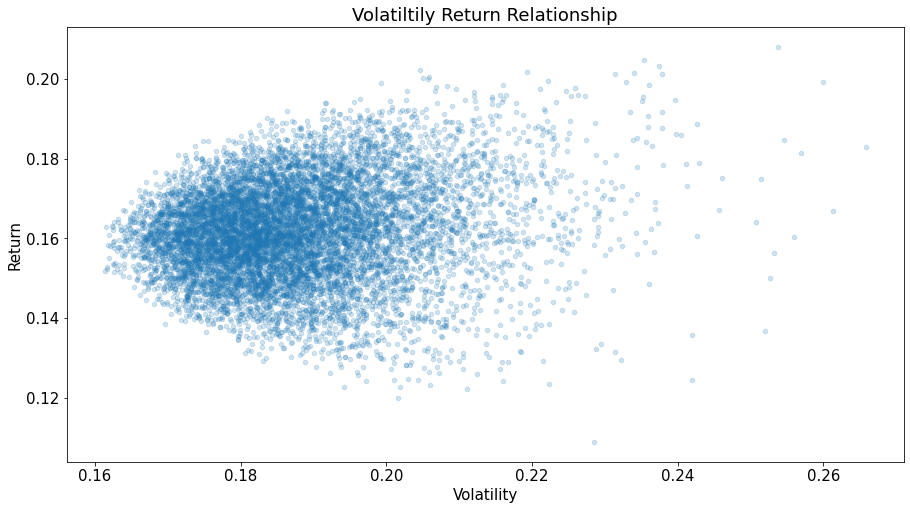

In [208]:
fig, ax = plt.subplots(figsize=(15,8))

plt.scatter(x=portfolio_method3.Volatility,
            y=portfolio_method3.Returns, 
            marker='o', 
            s=20, 
            alpha=0.2)

ax.set_ylabel('Return')
ax.set_xlabel('Volatility')

ax.set_title('Volatiltily Return Relationship')

In [260]:
portfolio_method3.nlargest(10, 'Sharp_ratio')['Returns']

5621    0.181043
6373    0.184434
6907    0.183169
8913    0.184397
4705    0.176601
9182    0.180856
8531    0.180306
5998    0.181423
7308    0.174078
576     0.176541
Name: Returns, dtype: float64

In [215]:
x = portfolio_method3.nlargest(1, 'Sharp_ratio').drop(['Returns', 'Volatility', 'Sharp_ratio'], axis=1)

In [238]:
list(x.iloc[0])

[0.1352437566567043,
 0.10085781531684392,
 0.09183022977381464,
 0.1392521362473074,
 0.14473427470223985,
 0.12476333880244546,
 0.13308137782251264,
 0.030675205358140188,
 0.05333073518168827,
 0.04623113013830339]

'First Trust Cloud Computing UCITS ETF'

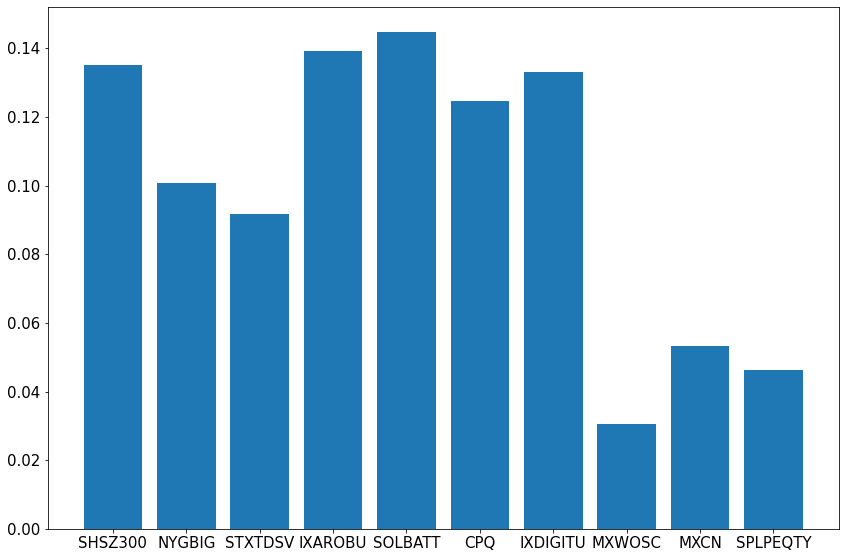

In [249]:
plt.figure(figsize=(12,8))

plt.bar(x=x.columns.str[:-7], height=list(x.iloc[0]))

plt.tight_layout()

# Optimisation

In [153]:
def iteration():
    
    list2 = []

    listOLists = [a,b,c]
    
    for list1 in itertools.product(*listOLists):

        list2.append(list1)
        
    return list2

In [154]:
list2 = iteration()

In [155]:
iteration_result = pd.DataFrame(np.array(list2))

In [156]:
iteration_result['sum'] = iteration_result.sum(axis=1)

In [157]:
iteration_result = iteration_result[iteration_result['sum']==10]

In [158]:
iteration_result.rename(columns={0:'a', 1:'b', 2:'c'}, inplace=True)
iteration_result.drop('sum', axis=1, inplace=True)

In [168]:
iteration_result.reset_index(drop=True, inplace=True)

In [169]:
iteration_result

,a,b,c
0,0,0,10
1,0,1,9
2,0,2,8
3,0,3,7
4,0,4,6
...,...,...,...
61,8,1,1
62,8,2,0
63,9,0,1
64,9,1,0


In [ ]:
for item in iteration_result.index():
    
    method_3 = list(sharp_ratio.nlargest(5).index)
    method_3.extend(list(data.resample('Y').last().pct_change().mean().nlargest(2).index))
    method_3.extend(list(data_return.cov().sum().nsmallest(3).index))

In [253]:
method_3

['SOLBATT',
 'NYGBIG',
 'IXDIGITU',
 'IXAROBU',
 'CPQ',
 'STXTDSV',
 'NYGBIG',
 'CPQ',
 'SOLBATT',
 'SHSZ300']

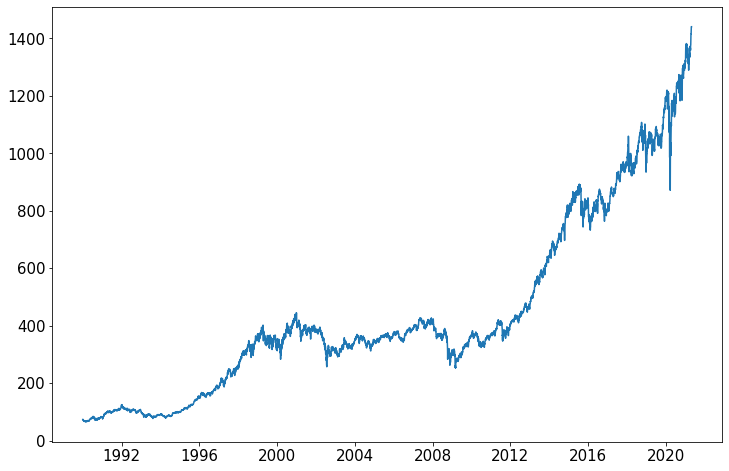

In [255]:
plt.figure(figsize=(12,8))
plt.plot(data['S5HLTH'])

#plt.legend(method_3)